 ### Homework 2
 ##### Siddhant Gupta
 #### 504421839

In [1]:
library(MASS)
library(tidyverse)
library(caret)
library(tidyverse)
library(leaps)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




``` 
1) In this exercise, we will predict the number of applications received using the other variables in the College data set in the ISLR2 package.

** be sure to look closely at this data, you may want to consider the multi-scale nature of the problem, and perhaps use a transformation on some of the variables.**

(a) Split the data set into a training set and a test set. Fit a linear model using least squares on the training set, and report the test error obtained.
 
(b) Fit a ridge regression model on the training set, with λ chosen by cross- validation. Report the test error      obtained.

(d) Fit a lasso model on the training set, with λ chosen by cross-validation. Report the test error obtained, along     with the number of non-zero coefficient estimates.

(g) Comment more generally on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these three approaches?
```

In [2]:
library(ISLR2)
library(glmnet)


Attaching package: ‘ISLR2’


The following object is masked from ‘package:MASS’:

    Boston


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-4



In [3]:
data(College)

In [4]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [5]:
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

In [6]:
dim(College)

[1] 777  18

In [7]:
sum(is.na(College))

[1] 0

#### NO Missing values

In [8]:
?College

In [9]:
X <- as.matrix(College[,1:18])
Y <- College[,2]
X <-X[,-2]

In [10]:
head(X)

,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [11]:
# create test and training
set.seed(123)
train_indis <- sample(c(1:length(College[,1])), size = round(2/3*length(College[,1])), replace = FALSE)

train = College[train_indis, ]
test = College[-train_indis, ]
y_true_train = train$Apps
y_true_test = test$Apps


In [12]:
dim(train)

[1] 518  18

#### Scaling the Data

In [13]:

preObj <- preProcess(train, method = c('center', 'scale'))


In [14]:
training <- predict(preObj, train)
testing <- predict(preObj, test)

In [15]:
head(training)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
North Central College,Yes,-0.5243162,-0.489630047,-0.5236119,0.14430279,0.43792845,-0.5112050,-0.07602569,0.3327731,2.7691306,-0.64066870,0.68090004,0.02412701,0.5172993,0.52037744,0.8170863,-0.133978697,0.5923453
Queens College,Yes,-0.7057870,-0.719063447,-0.7005784,0.25406614,0.33845599,-0.6614454,-0.20948204,0.1612469,0.5725029,0.34942307,0.83005099,0.02412701,-0.3061405,-0.06892228,1.0554927,-0.052907709,-0.4193835
East Texas Baptist University,Yes,-0.7464769,-0.742846177,-0.5730246,-0.95333075,-0.95468594,-0.5686499,-0.45425452,-1.3303924,-1.4088046,-0.14562281,0.23344716,-0.66325152,-1.1982002,0.34849835,-1.2491019,-0.727768902,-1.5435266
Simpson College,Yes,-0.5572839,-0.495225983,-0.5328050,-0.02034224,0.08977485,-0.5540677,-0.17688671,0.2177670,0.5815500,-0.02186134,0.08429621,-0.41329569,-0.4433804,0.37305251,1.0554927,-0.400563475,0.2551024
Eureka College,Yes,-0.6927187,-0.690151108,-0.7476928,0.47359285,0.04003862,-0.6937029,-0.53728036,0.1452738,-0.8026512,-1.38323753,-1.00450579,-0.66325152,0.5172993,-0.90376355,0.6581488,-0.009633331,-0.7004193
Clarkson University,Yes,-0.2133508,0.008874637,-0.2374778,0.41871117,0.63687336,-0.2854026,-0.51452513,1.3752005,1.1243740,0.90634969,-0.06485475,1.39888408,1.0662591,0.37305251,0.7376175,0.375088675,0.6485525


In [16]:
y_train <- training$Apps
y_test <- testing$Apps


In [17]:
one_hot_encoding <- dummyVars(Apps ~ ., data = training)
x_train <- predict(one_hot_encoding, training)
x_test <- predict(one_hot_encoding, testing)


### b) Fit a linear model using least squares on the training set, and report the test error obtained.



In [18]:
lin_model <- lm(Apps ~ ., data = training)

pred <- predict(lin_model, testing)

(lin_info <- postResample(pred, testing$Apps))

RMSE  Rsquared       MAE 
0.3854276 0.9326296 0.1884299

#### c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [19]:
ridge_fit <- train(x = x_train, y = y_train,
                   method = 'glmnet', 
                   trControl = trainControl(method = 'cv', number = 100),
                   tuneGrid = expand.grid(alpha = 0,
                                          lambda = seq(0, 10e2, length.out = 20)))

(ridge_info <- postResample(predict(ridge_fit, x_test), y_test))


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


RMSE  Rsquared       MAE 
0.4962020 0.8931634 0.2110435

In [20]:
coef(ridge_fit$finalModel, ridge_fit$bestTune$lambda)

19 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  0.043192117
Private.No   0.096565522
Private.Yes -0.097521495
Accept       0.505910323
Enroll       0.178823478
Top10perc    0.145942225
Top25perc   -0.005478591
F.Undergrad  0.130046414
P.Undergrad  0.002850769
Outstate    -0.018028638
Room.Board   0.073977156
Books        0.010943168
Personal    -0.014031716
PhD         -0.017309678
Terminal    -0.024302310
S.F.Ratio   -0.002833472
perc.alumni -0.043934989
Expend       0.126351323
Grad.Rate    0.053114048

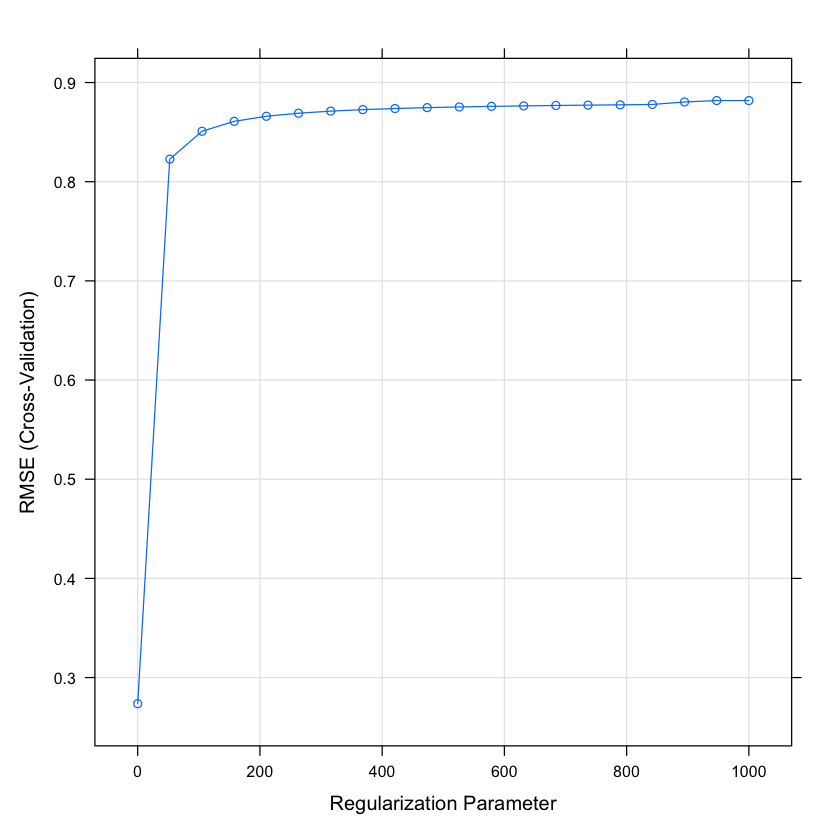

In [21]:
plot(ridge_fit)

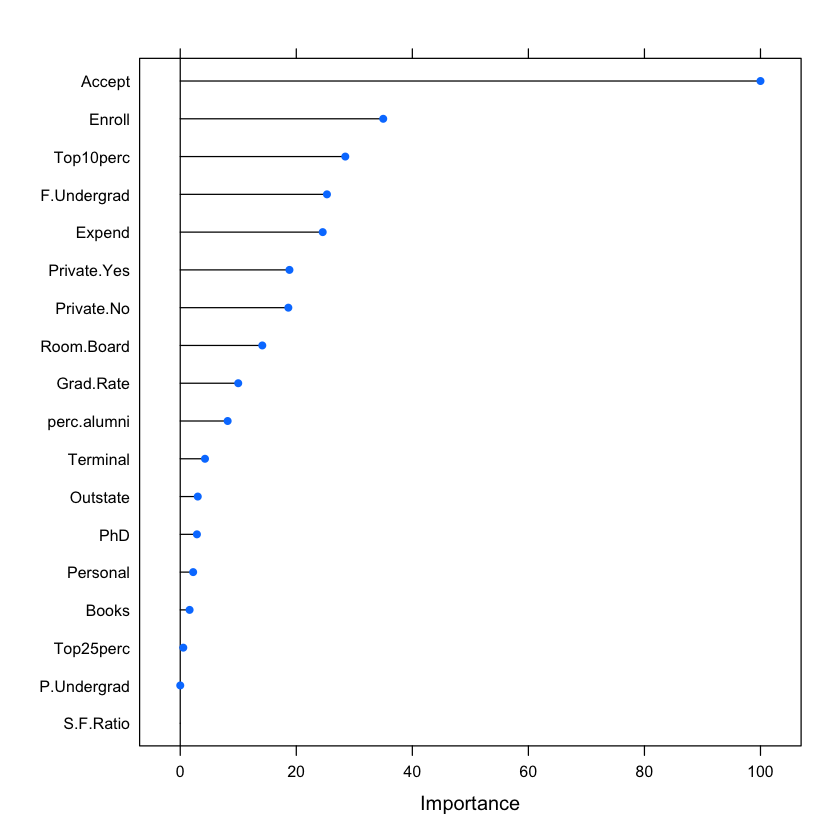

In [22]:
plot(varImp(ridge_fit))

### Here we can see the importance of different variables according to the ridge regression .

c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [23]:
lasso_fit <- train(x = x_train, y = y_train, 
                   method = 'glmnet',
                   trControl = trainControl(method = 'cv', number = 10),
                   tuneGrid = expand.grid(alpha = 1,
                                          lambda = seq(0.0001, 1, length.out = 50)))

(lasso_info <- postResample(predict(lasso_fit, x_test), y_test))

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


RMSE  Rsquared       MAE 
0.3856088 0.9326600 0.1874130

In [24]:
coef(lasso_fit$finalModel, lasso_fit$bestTune$lambda)

19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -5.157339e-02
Private.No   1.842415e-01
Private.Yes -8.817021e-14
Accept       7.804451e-01
Enroll       2.022951e-02
Top10perc    2.327451e-01
Top25perc   -6.586040e-02
F.Undergrad  3.395421e-02
P.Undergrad  1.457711e-02
Outstate    -7.200949e-02
Room.Board   6.369761e-02
Books        6.628969e-03
Personal    -6.063872e-03
PhD         -2.990245e-02
Terminal    -2.274204e-02
S.F.Ratio    .           
perc.alumni -2.601656e-02
Expend       1.296398e-01
Grad.Rate    4.886992e-02

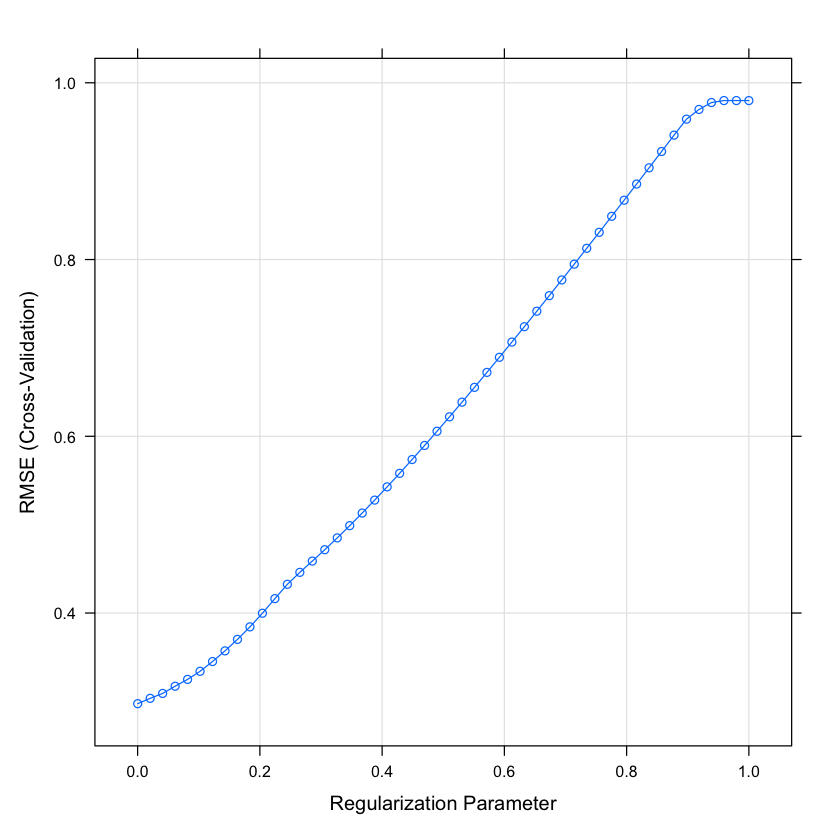

In [25]:
plot(lasso_fit)

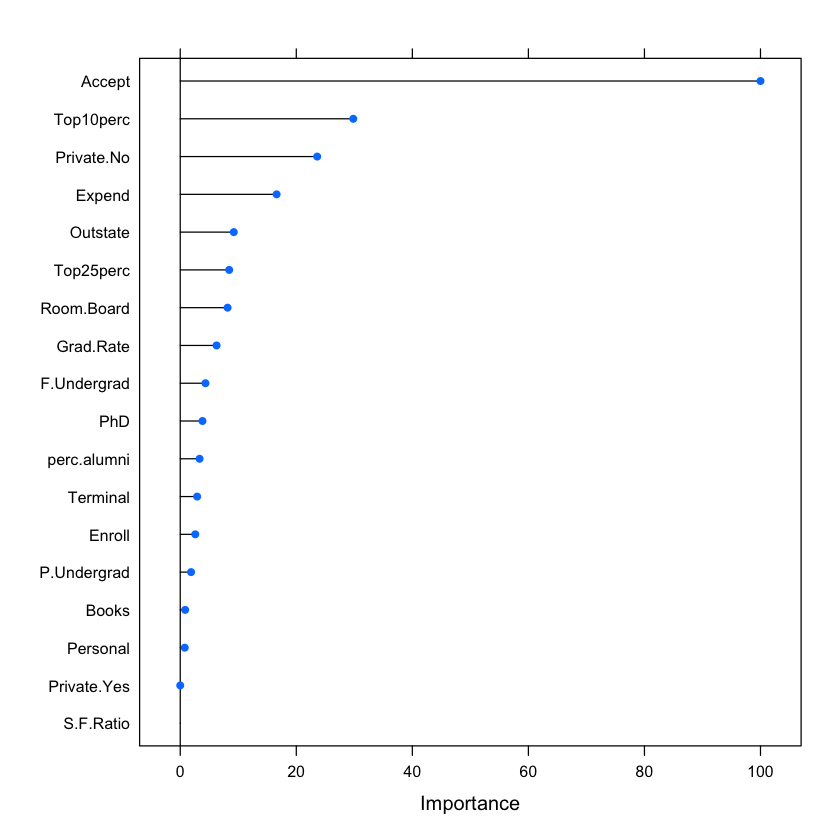

In [26]:
plot(varImp(lasso_fit))

(g) Comment more generally on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these three approaches?

In [27]:
as_frame <- rbind(lin_info,ridge_info,lasso_info)

In [28]:
as_frame

,RMSE,Rsquared,MAE
lin_info,0.3854276,0.9326296,0.1884299
ridge_info,0.4962020,0.8931634,0.2110435
lasso_info,0.3856088,0.9326600,0.1874130


In [29]:
### As we can see Lasso is the best for this dataset 


```
2) The insurance company benchmark data set gives information on customers. Specifically, it contains 86 variables on product-usage data and socio-demographic data derived from zip area codes. There are 5,822 customers in the training set and another 4,000 in the test set. The data were collected to answer the following questions: Can you predict who will be interested in buying a caravan insurance policy and give an explanation why? Compute the OLS estimates and compare them with those obtained from the following variable-selection algorithms: Forwards Selection, Backwards Selection, Lasso regression, and Ridge regression. What methods performed the best in the prediction?



```


In [30]:
train <- read.delim('ticdata2000.txt')

In [31]:
head(train)

,X33,X1,X3,X2,X8,X0,X5,X1.1,X3.1,X7,⋯,X0.37,X0.38,X0.39,X1.13,X0.40,X0.41,X0.42,X0.43,X0.44,X0.45
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,37,1,2,2,8,1,4,1,4,6,⋯,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,⋯,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,⋯,0,0,0,1,0,0,0,0,0,0
5,23,1,2,1,5,0,5,0,5,0,⋯,0,0,0,0,0,0,0,0,0,0
6,39,2,3,2,9,2,2,0,5,7,⋯,0,0,0,0,0,0,0,0,0,0


In [32]:
my_data2 <- read.delim('ticeval2000.txt')

In [33]:
head(my_data2)

,X33,X1,X4,X2,X8,X0,X6,X0.1,X3,X5,⋯,X0.37,X0.38,X0.39,X0.40,X1.12,X0.41,X0.42,X0.43,X0.44,X0.45
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6,1,3,2,2,0,5,0,4,5,⋯,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,⋯,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,⋯,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,⋯,0,0,0,0,1,0,0,0,0,0
5,30,1,2,4,7,1,4,2,3,5,⋯,0,0,0,0,2,0,0,0,0,0
6,35,1,2,4,8,2,5,1,2,8,⋯,0,0,0,0,1,0,0,0,0,0


In [34]:
dim(my_data2)

[1] 3999   85

In [35]:
y <- read.delim('tictgts2000.txt')

In [36]:
dim(y)

[1] 3999    1

In [37]:
test <- cbind(my_data2,y)

In [38]:
head(test)
dim(test)

,X33,X1,X4,X2,X8,X0,X6,X0.1,X3,X5,⋯,X0.38,X0.39,X0.40,X1.12,X0.41,X0.42,X0.43,X0.44,X0.45,X0
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6,1,3,2,2,0,5,0,4,5,⋯,0,0,0,1,0,0,0,0,0,1
2,39,1,3,3,9,1,4,2,3,5,⋯,0,0,0,1,0,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,⋯,0,0,0,1,0,0,0,0,0,0
5,30,1,2,4,7,1,4,2,3,5,⋯,0,0,0,2,0,0,0,0,0,0
6,35,1,2,4,8,2,5,1,2,8,⋯,0,0,0,1,0,0,0,0,0,0


[1] 3999   86

In [39]:
head(test[86])
head(train[86])

,X0
,<int>
1,1
2,0
3,0
4,0
5,0
6,0


,X0.45
,<int>
1,0
2,0
3,0
4,0
5,0
6,0


In [40]:
summary(train)

      X33              X1               X3              X2       
 Min.   : 1.00   Min.   : 1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:10.00   1st Qu.: 1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :30.00   Median : 1.000   Median :3.000   Median :3.000  
 Mean   :24.25   Mean   : 1.111   Mean   :2.679   Mean   :2.991  
 3rd Qu.:35.00   3rd Qu.: 1.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :41.00   Max.   :10.000   Max.   :5.000   Max.   :6.000  
       X8               X0               X5             X1.1     
 Min.   : 1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.00  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:0.00  
 Median : 7.000   Median :0.0000   Median :5.000   Median :1.00  
 Mean   : 5.773   Mean   :0.6966   Mean   :4.627   Mean   :1.07  
 3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.:6.000   3rd Qu.:2.00  
 Max.   :10.000   Max.   :9.0000   Max.   :9.000   Max.   :5.00  
      X3.1             X7             X0.1             X2.1     
 Min.   :0.

In [41]:
summary(test)

      X33              X1               X4              X2       
 Min.   : 1.00   Min.   : 1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:10.00   1st Qu.: 1.000   1st Qu.:2.000   1st Qu.:3.000  
 Median :30.00   Median : 1.000   Median :3.000   Median :3.000  
 Mean   :24.25   Mean   : 1.106   Mean   :2.675   Mean   :3.004  
 3rd Qu.:35.00   3rd Qu.: 1.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :41.00   Max.   :10.000   Max.   :6.000   Max.   :6.000  
       X8               X0               X6             X0.1      
 Min.   : 1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:0.000  
 Median : 7.000   Median :0.0000   Median :5.000   Median :1.000  
 Mean   : 5.786   Mean   :0.7069   Mean   :4.653   Mean   :1.022  
 3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.:6.000   3rd Qu.:2.000  
 Max.   :10.000   Max.   :9.0000   Max.   :9.000   Max.   :5.000  
       X3             X5             X0.2             X4.1      
 Min

In [42]:

inTrain <- createDataPartition(train$X0.45, p = 0.75, list = FALSE)

training <- train[inTrain,]
testing <- train[-inTrain,]


In [43]:
dim(training)

[1] 4366   86

In [44]:
dim(testing)

[1] 1455   86

In [45]:
y_train<-training$X0.45
y_test<-testing$X0.45
x_train<-training[,-86]
x_test<-testing[,-86]

In [46]:
df_train <- read.csv("ticdata2000.txt",header=F,na.string="?",sep="\t")
dim(df_train)

[1] 5822   86

In [47]:
X_train = df_train[-c(86)]
y_train = df_train[c(86)]
y_train$V86<- as.factor(y_train$V86)

In [48]:
head(y_train)

,V86
,<fct>
1,0
2,0
3,0
4,0
5,0
6,0


In [49]:
head(x_train)

,X33,X1,X3,X2,X8,X0,X5,X1.1,X3.1,X7,⋯,X0.36,X0.37,X0.38,X0.39,X1.13,X0.40,X0.41,X0.42,X0.43,X0.44
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,37,1,2,2,8,1,4,1,4,6,⋯,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,⋯,0,0,0,0,1,0,0,0,0,0
5,23,1,2,1,5,0,5,0,5,0,⋯,0,0,0,0,0,0,0,0,0,0
6,39,2,3,2,9,2,2,0,5,7,⋯,0,0,0,0,0,0,0,0,0,0
8,33,1,2,4,8,0,1,3,6,6,⋯,0,0,0,0,0,0,0,0,0,0
9,11,2,3,3,3,3,5,0,2,7,⋯,0,0,0,0,1,0,0,0,0,0


In [50]:
X_test = read.csv("ticeval2000.txt",header=F,na.string="?",sep="\t")
y_test  = read.csv("tictgts2000.txt",header=F,na.string="?",sep="\t")
y_test$V1<- as.factor(y_test$V1)

In [51]:
head(X_test)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,1,4,2,8,0,6,0,3,5,⋯,0,0,0,0,1,0,0,0,0,0
2,6,1,3,2,2,0,5,0,4,5,⋯,2,0,0,0,1,0,0,0,0,0
3,39,1,3,3,9,1,4,2,3,5,⋯,1,0,0,0,1,0,0,0,0,0
4,9,1,2,3,3,2,3,2,4,5,⋯,0,0,0,0,1,0,0,0,0,0
5,31,1,2,4,7,0,2,0,7,9,⋯,0,0,0,0,1,0,0,0,0,0
6,30,1,2,4,7,1,4,2,3,5,⋯,0,0,0,0,2,0,0,0,0,0


In [52]:
lin_model <- lm(formula = df_train$V86 ~.,data = df_train)



In [53]:
pred <- predict(lin_model, X_test)

print(pred[66])


        66 
0.05380174 


In [54]:
# a utility function to assign prediction
pred <- predict(lin_model, X_test)

print(pred[66])


for (i in 1:4000){
    
    if (pred[i]>0.5){
        pred[i]<-1
    }
    else
        {
        pred[i]<-0
        
    }
}

        66 
0.05380174 


In [55]:
print(pred[66])

66 
 0 


In [56]:
library(caret)
library(e1071)

In [57]:
y_test[66,]

[1] 0
Levels: 0 1

In [58]:
cm = as.matrix(table(Actual = y_test$V1, Predicted = pred)) # create the confusion matrix
cm

      Predicted
Actual    0    1
     0 3760    2
     1  237    1

In [59]:
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes

In [60]:
 accuracy_lin = sum(diag) / n 

In [61]:
accuracy_lin

[1] 0.94025

### Ridge Regression 

In [62]:
ridge_fit <- train(x = X_train, y = y_train$V86,
                   method = 'glmnet', 
                   trControl = trainControl(method = 'cv', number = 10),
                   tuneGrid = expand.grid(alpha = 0,
                                          lambda = seq(0, 10e2, length.out = 20)))

(ridge_info <- postResample(predict(ridge_fit, X_test), y_test$V1))



Accuracy    Kappa 
  0.9405   0.0000

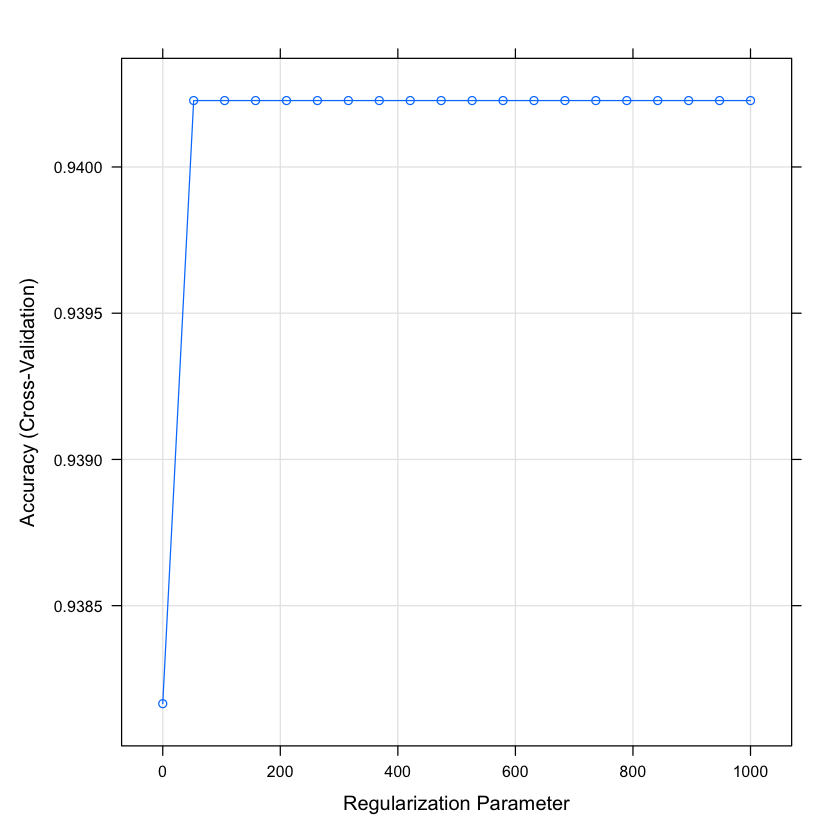

In [63]:
plot(ridge_fit)

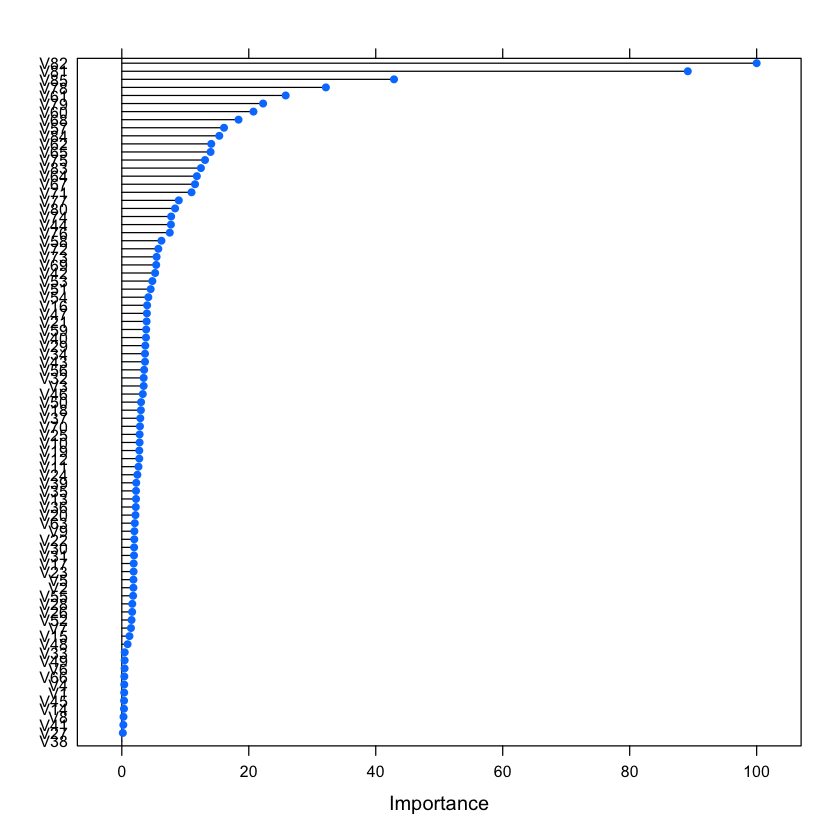

In [64]:

plot(varImp(ridge_fit))


### Lasso

In [65]:
lasso_fit <- train(x = X_train, y = as.factor(y_train$V86), 
                   method = 'glmnet',
                   trControl = trainControl(method = 'cv', number = 10),
                   tuneGrid = expand.grid(alpha = 1,
                                          lambda = seq(0.0001, 5, length.out = 2)))

(lasso_info <- postResample(predict(lasso_fit, X_test), y_test$V1))

Accuracy    Kappa 
  0.9405   0.0000

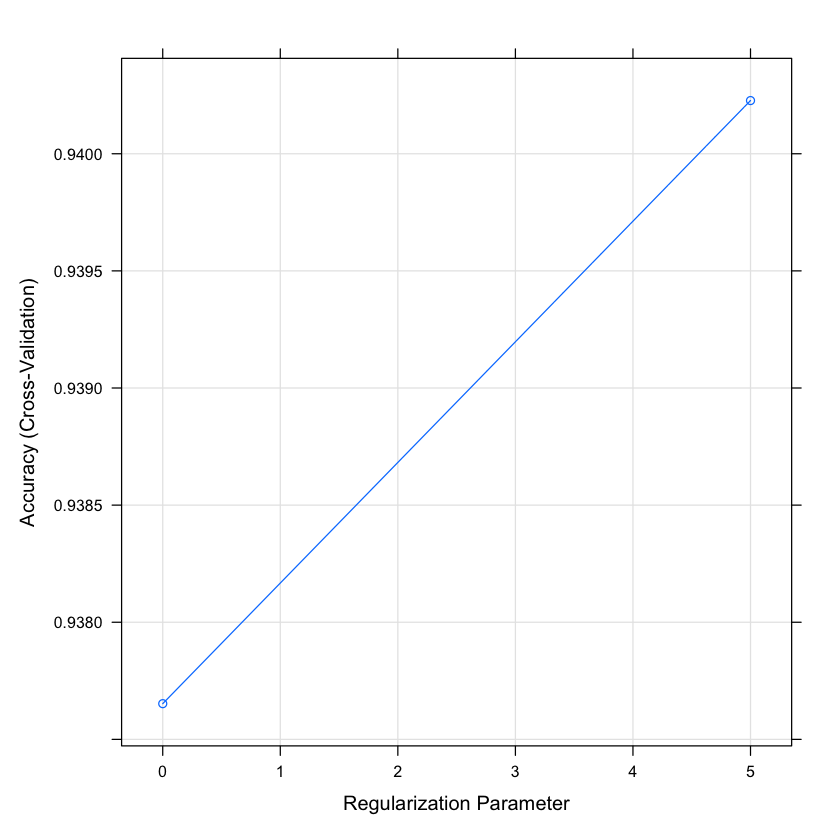

In [66]:
plot(lasso_fit)

```
3) ESL textbook exercise 2.8 modified: Compare the classification
performance of linear regression and k-nearest neighbor classification on the zipcode data. In particular, consider only the 7’s and 9’s for this problem, and k = 1, 3, 5, 7, 9, 11, 13,15. Show the test error for each choice of k. Describe your results – are you surprised by the differences in performance?
The zipcode data is available https://hastie.su.domains/ElemStatLearn/ in the “Data” tab. The data can be obtained as test/training and/or by number.
```

In [70]:
library(grid)

In [71]:
library(readr)
library(caret)

In [72]:
train<-read.table("zip.train")
test<-read.table("zip.test")

In [73]:
head(train)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,⋯,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1
2,5,-1,-1,-1,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,⋯,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1
3,4,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,⋯,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1
4,7,-1,-1,-1,-1.000,-1.000,-0.273,0.684,0.960,0.450,⋯,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1
5,3,-1,-1,-1,-1.000,-1.000,-0.928,-0.204,0.751,0.466,⋯,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1
6,6,-1,-1,-1,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,⋯,0.803,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1


In [74]:
train$V1

[1] 6 5 4 7 3 6 3 1 0 1 7 0 1 1 7 7 4 8 0 1 4 8 7 4 8 7 3 7 4 1 3 6 7 4 1 3 7
  [38] 7 4 5 4 2 7 4 1 3 7 7 4 0 6 3 2 0 8 6 6 2 0 8 7 8 2 0 9 0 2 2 0 8 1 2 0 8
  [75] 3 3 2 8 2 2 0 8 1 4 4 8 9 8 9 6 7 6 1 9 7 0 8 0 4 6 8 0 0 3 0 8 0 9 0 3 8
 [112] 0 1 2 2 9 0 6 6 5 9 2 0 9 1 4 1 2 7 1 0 9 0 8 0 7 9 1 3 0 4 4 3 5 1 6 8 5
 [149] 4 4 6 8 4 4 8 6 4 0 2 3 9 8 6 8 9 3 5 6 8 0 2 2 6 8 4 1 0 2 7 1 0 2 2 7 1
 [186] 0 9 2 7 0 4 8 0 8 7 2 7 1 3 2 7 3 2 2 2 7 1 0 2 2 8 5 4 2 2 7 8 7 0 2 7 1
 [223] 0 2 6 0 2 7 6 0 8 2 7 1 1 0 1 7 7 6 4 4 6 2 9 1 1 9 0 3 1 1 8 1 0 3 1 6 1
 [260] 1 7 5 5 3 6 5 0 6 8 8 0 0 0 1 4 9 5 7 0 0 0 1 6 0 1 9 8 6 0 1 9 8 6 8 0 0
 [297] 9 6 8 5 4 4 9 4 0 8 6 4 8 1 2 1 2 1 2 6 8 0 2 1 3 0 2 3 2 3 5 8 0 2 7 9 0
 [334] 0 0 0 6 8 9 7 7 9 4 9 1 2 9 4 5 3 8 5 7 1 8 0 1 4 6 5 5 3 2 0 1 0 6 6 6 6
 [371] 0 9 0 2 6 0 5 5 9 6 1 7 7 7 6 1 8 2 0 6 0 5 2 1 6 1 8 6 6 6 0 9 0 2 6 0 2
 [408] 5 6 0 9 0 2 6 0 5 2 1 6 0 5 4 6 6 4 7 3 6 1 8 2 1 6 0 9 0 2 6 0 4 3 5 6 0
 [445] 5 6 1 8 2 0 6 0 9 0 2 6 1 8 0 1 6 0 5 2 2 6 1 7 6 1 6 0 4 7 3 1 8 2 6 0 9
 [482] 0 2 6 1 7 0 1 6 0 5 2 2 0 9 2 7 6 0 9 0 2 6 1 8 2 1 6 1 9 1 3 6 0 9 0 2 6
 [519] 1 9 0 0 4 6 2 6 1 8 0 1 4 6 9 9 2 9 7 1 0 2 8 0 7 0 2 9 7 1 0 2 8 2 3 4 2
 [556] 8 2 1 2 2 8 6 5 8 2 8 7 3 9 2 8 2 1 7 2 8 2 7 2 0 0 9 2 2 8 3 6 2 8 3 0 3
 [593] 2 8 6 0 1 2 8 1 0 2 8 2 6 5 2 8 2 6 2 8 4 3 2 8 2 3 2 8 1 1 2 3 2 2 6 2 1
 [630] 2 2 2 1 1 6 2 7 0 2 2 4 0 1 2 3 4 5 2 3 0 6 0 9 3 0 0 3 0 0 8 8 3 0 0 8 3
 [667] 3 0 2 4 0 3 0 8 1 5 3 0 2 7 4 3 0 8 0 9 3 0 0 3 0 2 3 0 2 4 7 8 1 1 1 1 2
 [704] 1 3 7 2 1 0 3 8 0 3 7 1 3 0 8 5 1 6 8 5 7 0 8 9 1 1 9 8 0 0 0 5 2 0 0 1 1
 [741] 2 0 0 3 7 5 9 4 0 2 9 7 4 1 0 2 1 3 0 0 2 2 1 5 0 2 1 0 9 0 2 1 4 6 0 1 7
 [778] 2 0 0 1 9 0 6 0 2 1 3 8 0 1 9 7 0 0 1 8 4 1 0 1 3 6 4 0 2 6 0 1 0 1 8 3 0
 [815] 9 1 0 4 9 8 0 7 2 0 0 6 5 0 9 0 0 6 3 0 0 0 9 0 7 0 0 9 3 4 4 0 6 9 0 0 7
 [852] 0 8 0 6 6 0 0 9 1 8 6 5 4 0 0 6 0 4 0 0 7 5 8 0 0 2 3 0 0 6 6 0 0 9 0 7 0
 [889] 0 9 2 3 0 0 9 1 2 0 0 6 9 7 0 7 5 4 2 3 5 5 7 1 8 8 6 0 0 1 8 0 2 0 2 0 4
 [926] 8 2 8 0 6 0 2 1 3 2 9 7 1 0 4 0 1 8 5 0 2 3 8 5 3 4 5 8 9 1 0 7 3 8 1 5 2
 [963] 4 6 2 0 6 0 1 0 7 4 6 9 1 2 2 3 2 0 4 8 8 3 8 6 6 6 1 4 9 7 0 0 6 9 7 4 0
[1000] 5 9 8 0 0 2 9 0 9 8 4 0 8 4 9 5 5 0 4 8 2 3 2 2 6 9 8 4 8 0 8 4 0 7 2 0 8
[1037] 5 0 0 6 5 3 7 0 6 9 2 5 7 6 5 7 1 9 6 5 4 6 8 5 4 4 6 8 0 0 9 6 8 8 0 3 6
[1074] 8 1 1 4 8 5 0 2 7 8 5 7 1 8 8 5 2 2 7 1 1 8 9 3 1 9 0 1 1 9 9 7 7 1 9 7 1
[1111] 4 1 9 1 1 9 7 1 4 1 9 7 2 6 0 0 0 6 6 2 2 2 4 6 3 1 6 4 6 3 1 4 6 6 5 4 7
[1148] 3 9 0 0 1 9 0 0 4 5 7 0 0 6 2 7 0 8 0 9 7 0 0 9 4 0 2 9 6 4 0 5 0 5 4 1 0
[1185] 1 7 2 4 0 7 9 4 1 2 2 8 4 2 5 4 1 4 1 7 0 1 4 1 5 3 1 4 0 9 1 4 4 3 0 1 4
[1222] 2 1 0 1 4 3 1 1 4 1 4 7 2 4 1 9 4 2 5 0 1 4 2 5 0 1 4 2 5 0 1 4 1 1 3 9 1
[1259] 4 7 0 3 2 1 2 3 2 1 2 0 2 2 1 2 6 8 2 1 2 0 2 1 2 6 2 1 4 0 4 2 1 7 0 1 1
[1296] 2 1 2 2 8 3 0 3 6 6 3 0 3 2 6 3 0 3 5 6 0 3 4 9 3 0 3 0 2 6 3 0 3 4 4 3 0
[1333] 3 2 7 1 9 9 6 6 1 9 8 0 3 1 9 7 1 3 1 9 5 1 9 0 6 1 9 8 0 4 1 9 7 1 3 6 7
[1370] 2 1 7 7 7 4 8 6 7 0 6 2 7 2 4 1 7 2 5 0 3 7 2 5 1 2 7 2 2 0 3 7 2 0 3 2 3
[1407] 7 4 0 5 3 8 1 5 1 3 8 1 3 4 3 7 0 7 5 3 8 1 3 8 3 8 1 1 7 3 7 2 0 2 9 6 0
[1444] 7 3 7 0 8 3 8 0 5 0 1 9 8 9 9 1 9 9 6 8 1 9 7 2 0 1 9 8 8 0 4 0 3 1 9 7 1
[1481] 1 1 9 7 1 1 1 7 7 1 7 4 0 4 1 7 6 0 1 1 7 0 1 3 1 7 5 7 3 1 7 0 1 1 1 7 5
[1518] 7 3 1 7 3 6 0 1 7 8 3 7 1 7 5 4 7 1 7 0 6 6 1 7 6 0 4 3 0 0 1 7 7 6 3 7 5
[1555] 7 3 1 6 9 1 5 7 3 4 0 1 1 7 0 5 5 1 7 3 1 1 7 5 7 3 1 7 3 0 6 1 7 0 2 1 7
[1592] 2 6 8 1 7 4 0 7 1 7 3 3 3 1 7 0 1 1 1 7 0 5 5 1 9 7 2 0 1 9 7 2 6 0 0 1 1
[1629] 9 8 0 4 1 9 7 0 3 1 9 7 1 1 9 8 5 0 1 9 7 0 7 9 7 0 0 1 9 8 0 3 9 8 5 1 9
[1666] 8 9 1 0 1 9 6 1 9 0 6 7 0 2 2 7 7 1 1 0 0 1 9 7 2 6 0 0 1 0 1 9 8 0 5 1 9
[1703] 8 9 7 9 8 9 9 1 4 2 0 1 8 0 2 1 7 1 1 0 1 9 7 2 6 0 0 1 0 0 5 4 0 1 0 5 3
[1740] 4 5 0 5 4 0 1 0 5 4 0 1 0 5 6 4 1 0 8 8 7 0 2 8 8 2 0 3 7 7 0 0 6 2 2 6 0
[1777] 6 0 3 8 0 6 7 9 0 0 8 7 0 6 0 9 1 3 5 0 6 1 0 3 0 6 0 8 7 0 6 0 8 7 0 4 0
[1814] 9 6 0 4 9 6 3 4 9 2 0 0 4 7

### According the question we need 7's and 9's.


In [75]:
train_data = train[train[,1]==7 | train[,1]==9,]

In [76]:
test_data = test[test[,1]==7 | test[,1]==9,]

In [77]:
head(train_data)
tail(train_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,7,-1,-1,-1,-1.000,-1.000,-0.273,0.684,0.960,0.450,⋯,-0.318,1.000,0.536,-0.987,-1,-1,-1,-1,-1,-1
11,7,-1,-1,-1,-1.000,-1.000,-0.596,0.912,1.000,0.290,⋯,-1.000,-0.795,0.663,-0.074,-1,-1,-1,-1,-1,-1
15,7,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,⋯,-1.000,-0.967,0.866,-0.001,-1,-1,-1,-1,-1,-1
16,7,-1,-1,-1,-0.929,0.351,0.798,0.806,0.114,0.015,⋯,0.835,-0.086,-0.991,-1.000,-1,-1,-1,-1,-1,-1
23,7,-1,-1,-1,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,⋯,-0.933,0.667,-0.315,-1.000,-1,-1,-1,-1,-1,-1
26,7,-1,-1,-1,-1.000,-0.846,-0.011,-0.920,-1.000,-1.000,⋯,-1.000,0.008,0.405,-1.000,-1,-1,-1,-1,-1,-1


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7208,9,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-0.877,⋯,-1.000,-1.000,-0.999,0.598,0.697,-0.742,-1,-1,-1,-1
7209,9,-1,-1,-1,-1.000,-1.000,-1.000,-0.440,0.453,1.000,⋯,-1.000,-0.980,0.774,0.144,-0.955,-1.000,-1,-1,-1,-1
7243,9,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-0.729,0.892,⋯,-1.000,-0.943,0.557,0.635,-1.000,-1.000,-1,-1,-1,-1
7245,7,-1,-1,-1,-1.000,-1.000,-0.954,0.125,0.709,0.647,⋯,-0.491,0.866,-0.065,-1.000,-1.000,-1.000,-1,-1,-1,-1
7248,9,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-0.859,-0.018,⋯,-1.000,0.114,0.170,-1.000,-1.000,-1.000,-1,-1,-1,-1
7276,9,-1,-1,-1,-0.982,-0.643,-0.089,0.515,0.834,1.000,⋯,0.856,-0.400,-1.000,-1.000,-1.000,-1.000,-1,-1,-1,-1


In [78]:
train_data[train_data$V1==7 , "V1"]<- 0 
test_data[test_data$V1==7 , "V1"]<- 0 

In [79]:
train_data[train_data$V1==9 , "V1"]<- 1
test_data[test_data$V1==9 , "V1"]<- 1

In [80]:
head(train_data)
tail(train_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0,-1,-1,-1,-1.000,-1.000,-0.273,0.684,0.960,0.450,⋯,-0.318,1.000,0.536,-0.987,-1,-1,-1,-1,-1,-1
11,0,-1,-1,-1,-1.000,-1.000,-0.596,0.912,1.000,0.290,⋯,-1.000,-0.795,0.663,-0.074,-1,-1,-1,-1,-1,-1
15,0,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,⋯,-1.000,-0.967,0.866,-0.001,-1,-1,-1,-1,-1,-1
16,0,-1,-1,-1,-0.929,0.351,0.798,0.806,0.114,0.015,⋯,0.835,-0.086,-0.991,-1.000,-1,-1,-1,-1,-1,-1
23,0,-1,-1,-1,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,⋯,-0.933,0.667,-0.315,-1.000,-1,-1,-1,-1,-1,-1
26,0,-1,-1,-1,-1.000,-0.846,-0.011,-0.920,-1.000,-1.000,⋯,-1.000,0.008,0.405,-1.000,-1,-1,-1,-1,-1,-1


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7208,1,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-0.877,⋯,-1.000,-1.000,-0.999,0.598,0.697,-0.742,-1,-1,-1,-1
7209,1,-1,-1,-1,-1.000,-1.000,-1.000,-0.440,0.453,1.000,⋯,-1.000,-0.980,0.774,0.144,-0.955,-1.000,-1,-1,-1,-1
7243,1,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-0.729,0.892,⋯,-1.000,-0.943,0.557,0.635,-1.000,-1.000,-1,-1,-1,-1
7245,0,-1,-1,-1,-1.000,-1.000,-0.954,0.125,0.709,0.647,⋯,-0.491,0.866,-0.065,-1.000,-1.000,-1.000,-1,-1,-1,-1
7248,1,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-0.859,-0.018,⋯,-1.000,0.114,0.170,-1.000,-1.000,-1.000,-1,-1,-1,-1
7276,1,-1,-1,-1,-0.982,-0.643,-0.089,0.515,0.834,1.000,⋯,0.856,-0.400,-1.000,-1.000,-1.000,-1.000,-1,-1,-1,-1


In [81]:
y_train<- train_data$V1
y_test<- test_data$V1

### Linear Model

In [82]:
lm_fit<- lm(V1 ~. , data =train_data)


Warning message:
“not plotting observations with leverage one:
  17, 343, 393, 500, 511, 959, 1236”


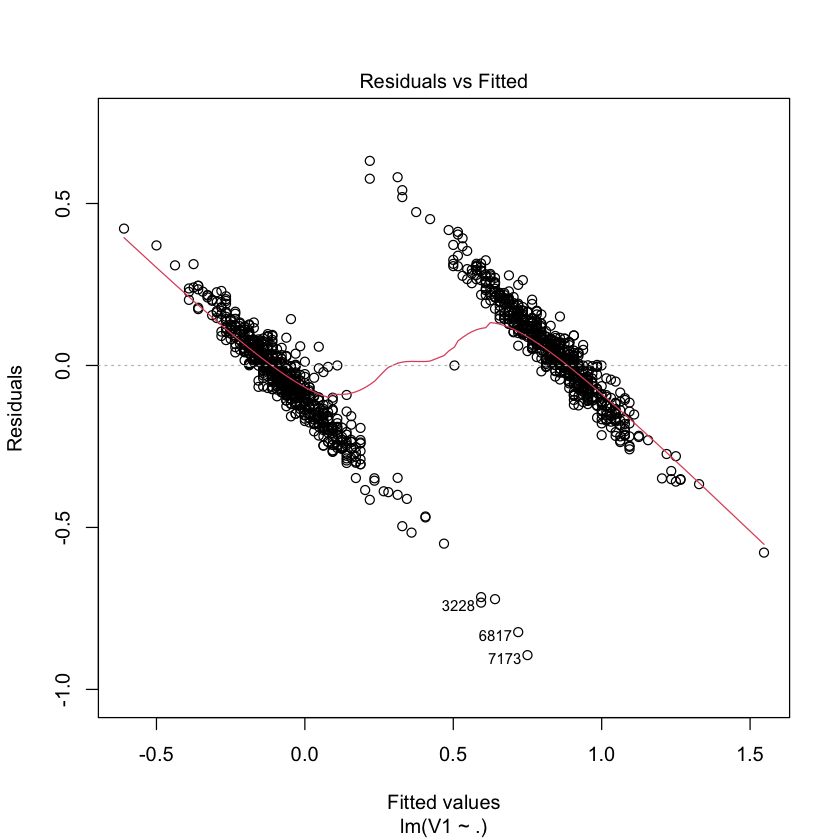

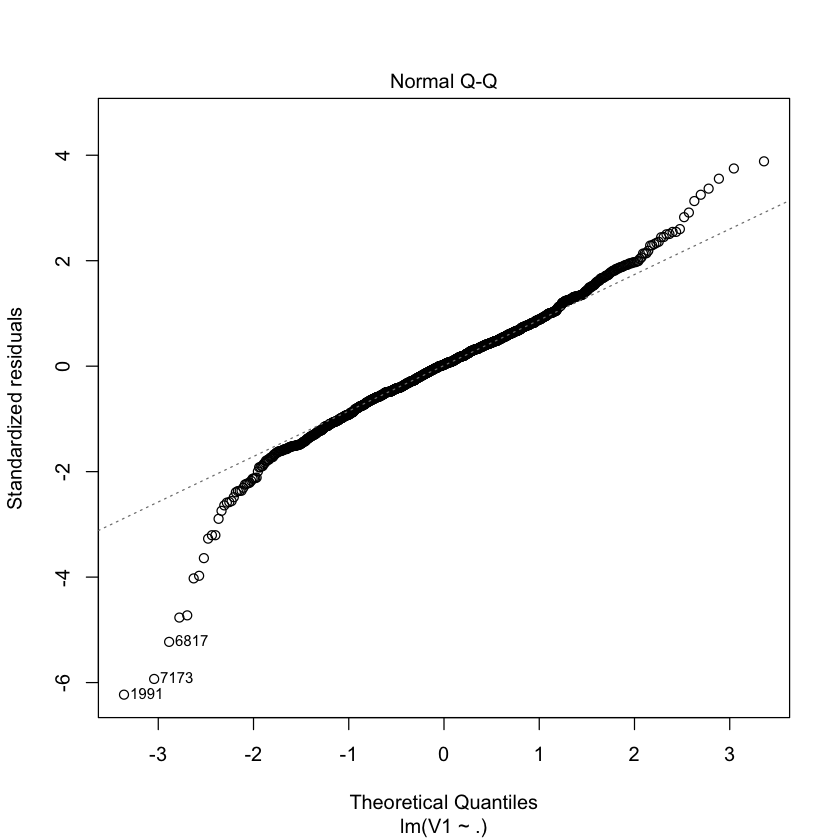

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


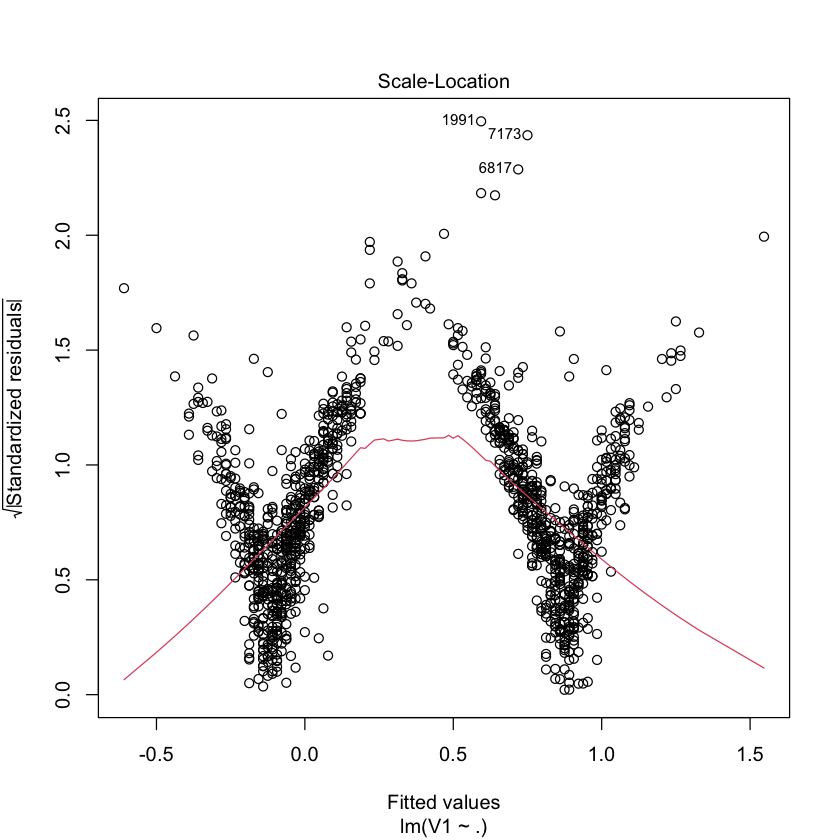

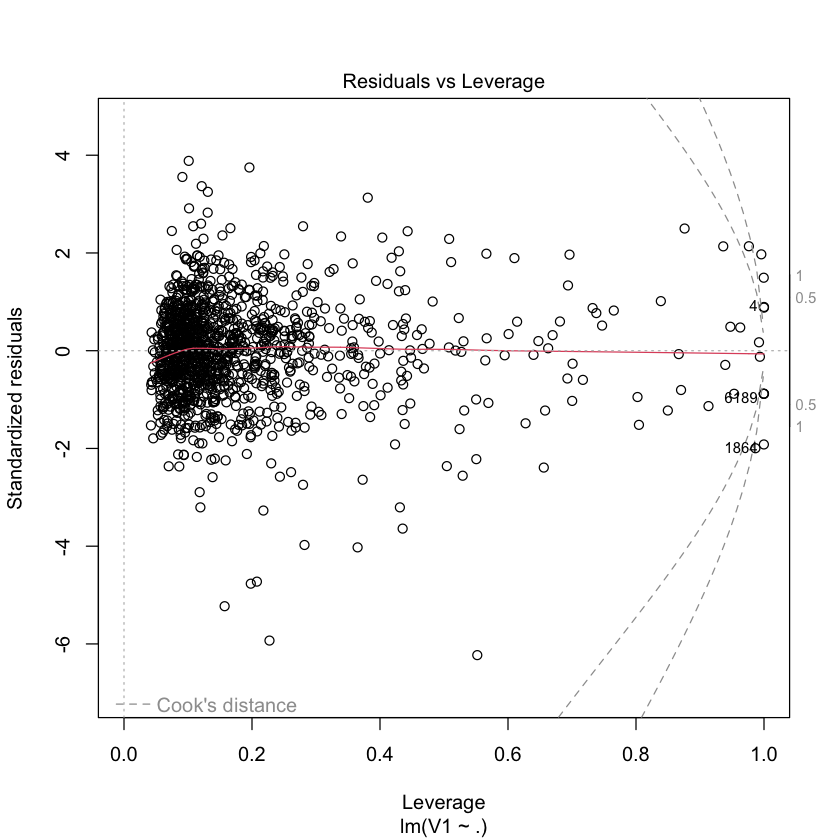

In [83]:
plot(lm_fit)

In [84]:
pred <- predict(lm_fit, test_data)





Warning message in predict.lm(lm_fit, test_data):
“prediction from a rank-deficient fit may be misleading”


In [85]:
dim(test_data)

[1] 324 257

In [86]:
for (i in 1:324){
    
    if (pred[i]>0.5){
        pred[i]<-1
    }
    else
        {
        pred[i]<-0
        
    }
}

In [87]:
pred

1   10   19   24   31   35   36   40   45   58   61   66   73   76   83   87 
   1    1    1    1    0    0    1    0    0    1    1    1    0    1    0    0 
  91   97  100  103  106  109  113  114  115  118  119  136  139  140  141  147 
   1    0    1    0    0    1    1    1    0    1    1    0    0    0    1    0 
 150  156  162  167  173  197  220  222  236  254  262  263  268  290  291  292 
   1    1    1    1    1    0    1    1    1    1    0    0    0    0    1    1 
 293  295  296  297  300  301  302  303  304  305  306  311  321  326  336  340 
   0    0    1    1    0    1    1    0    1    1    0    0    0    1    1    0 
 369  374  382  435  440  450  453  458  461  467  468  470  473  474  478  479 
   0    0    1    1    1    0    0    0    1    1    1    1    1    0    1    0 
 481  483  484  488  509  516  524  532  537  541  542  547  556  561  574  591 
   0    1    0    1    0    0    1    1    1    0    1    1    0    0    0    1 
 596  610  621  622  649  658  688  689  690  710  711  737  756  764  771  774 
   1    1    1    0    1    0    0    1    1    1    0    1    0    1    1    1 
 783  795  804  814  819  833  839  842  850  852  857  862  866  870  876  877 
   0    0    1    1    1    0    1    1    1    1    1    1    0    1    1    0 
 878  880  887  903  909  914  917  922  927  932  934  937  940  945  949  954 
   1    1    1    0    0    0    1    1    1    1    0    1    1    1    1    0 
 955  957  986  996  997 1001 1017 1023 1026 1027 1028 1032 1047 1068 1071 1073 
   0    1    1    1    1    1    1    0    1    1    1    0    1    1    0    1 
1074 1076 1081 1090 1095 1096 1106 1108 1110 1114 1119 1124 1133 1137 1138 1142 
   0    0    0    0    0    0    0    0    0    0    0    1    0    1    0    1 
1143 1147 1152 1156 1158 1166 1171 1176 1177 1183 1188 1192 1193 1194 1196 1199 
   0    1    1    0    1    1    1    0    0    0    0    1    1    0    1    0 
1202 1206 1207 1212 1214 1217 1219 1222 1224 1227 1237 1240 1242 1247 1255 1257 
   0    1    0    1    1    1    0    1    0    1    0    0    0    0    1    1 
1260 1264 1283 1290 1292 1303 1319 1338 1339 1343 1354 1355 1363 1384 1399 1420 
   0    1    0    0    0    1    0    1    1    0    1    1    0    1    1    1 
1422 1439 1454 1500 1503 1515 1519 1524 1528 1529 1533 1534 1539 1544 1545 1558 
   0    1    1    0    1    1    1    0    0    0    1    0    0    0    1    0 
1571 1581 1585 1590 1593 1595 1600 1605 1606 1615 1624 1640 1644 1654 1658 1659 
   1    1    1    1    0    1    1    1    1    1    0    0    0    1    1    1 
1663 1666 1671 1678 1680 1681 1685 1686 1690 1694 1699 1708 1713 1715 1718 1724 
   0    0    0    0    1    1    1    1    0    1    0    0    0    0    0    1 
1737 1739 1744 1747 1749 1754 1756 1764 1770 1788 1789 1793 1794 1796 1797 1798 
   0    1    1    1    1    1    0    1    0    1    0    1    1    1    1    0 
1807 1818 1846 1853 1854 1855 1856 1857 1861 1865 1867 1878 1879 1889 1894 1898 
   0    1    0    1    1    0    1    1    1    0    0    0    1    0    0    1 
1899 1903 1904 1905 1907 1913 1914 1916 1918 1919 1923 1924 1931 1937 1955 1957 
   1    1    1    0    1    1    0    0    1    0    1    0    1    0    1    1 
1961 1963 1998 2004 
   0    0    0    1

In [88]:
cm = as.matrix(table(Actual = y_test, Predicted = pred)) # create the confusion matrix
cm
Lm_error <- mean(pred != y_test)

      Predicted
Actual   0   1
     0 138   9
     1   5 172

In [89]:
Lm_error

[1] 0.04320988

### KNN Mod (k = 1, 3, 5, 7, 9, 11, 13,15.)

In [90]:
library(class)
k <- c(1, 3, 5, 7,9,11,13, 15)
k.error <- rep(NA, length(k))
for (i in 1:length(k)) {
    yhat <- knn(train_data, test_data, y_train, k[i])
    k.error[i] <- mean(yhat != y_test)
}

In [91]:
error <- matrix(c(Lm_error, k.error), ncol = 1)
colnames(error) <- c("Error Rate")
rownames(error) <- c("Linear Regression", paste("k-NN with k =", k))
error


,Error Rate
Linear Regression,0.04320988
k-NN with k = 1,0.02469136
k-NN with k = 3,0.02469136
k-NN with k = 5,0.02469136
k-NN with k = 7,0.02777778
k-NN with k = 9,0.03086420
k-NN with k = 11,0.03395062
k-NN with k = 13,0.03703704
k-NN with k = 15,0.03395062


#### As we can see k =1 and 3 produces best accuracy 

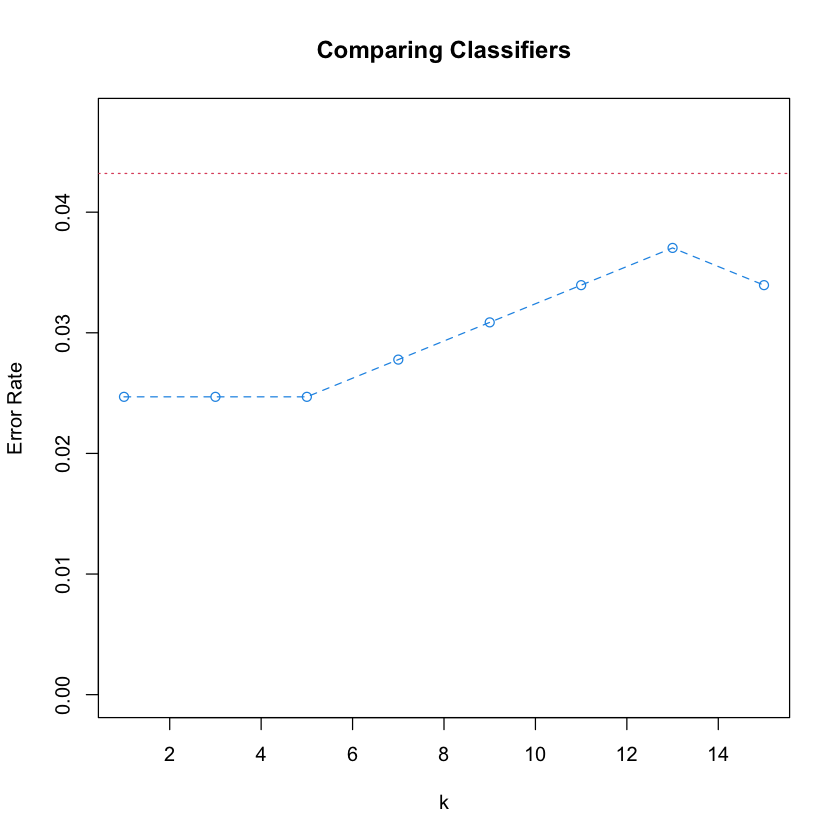

In [93]:
plot(c(1, 15), c(0, 1.1 * max(error)), type = "n", main = "Comparing Classifiers", 
     ylab = "Error Rate", xlab = "k")
abline(h = Lm_error, col = 2, lty = 3)
points(k, k.error, col = 4)
lines(k, k.error, col = 4, lty = 2)